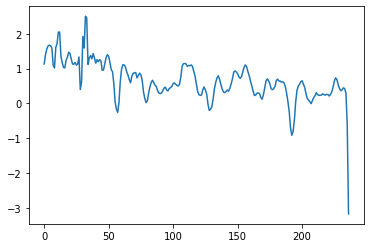

In [2]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import Traitement as tr
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

#Nous récupérons les données pour la france
data = pd.read_csv('./data/data.csv', sep=';')
df_fra = data[data['LOCATION'] == "FRA"]
gpy, gpp, ind = tr.traitementParPays(df_fra, 'Q')
#Nous récupérons les valeurs des moyennes mobiles
data = pd.DataFrame(tr.mobilMoy(gpp,4)[0], columns=['id','date','valeur'])
data["valeur"].plot()
plt.show()

In [154]:
def ar(data):
    X = data['valeur']
    train, test = X[1:len(X)-30], X[len(X)-30:]
    window = 10
    model = AutoReg(train, lags=10)
    model_fit = model.fit()
    coef = model_fit.params
    history = train[len(train)-window:]
    history = list(history)
    history = [history[i] for i in range(len(history))]
    predictions = list()
    test = list(test)
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    return coef

Le test RMSE est faible, ce qui montre que le modèle est correcte

In [9]:
def arima(data,p,d,q):
    X = data['valeur']
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    train = list(train)
    test = list(test)
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        # print('predicted=%f, expected=%f' % (yhat, obs))
    error = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    return ARIMA(history, order=(p,d,q))

In [12]:
finF = 250
date = list(data['date'])
for i in range(237,finF+1):
    var =  date[-1].split('-')[1]
    if(var == 'Q1'):
        var = date[-1].split('-')[0] + '-Q2'
    elif(var == 'Q2'):
        var = date[-1].split('-')[0] + '-Q3'
    elif(var == 'Q3'):
        var = date[-1].split('-')[0] + '-Q4'
    elif(var == 'Q4'):
        var = str(int(date[-1].split('-')[0])+1) + '-Q1'
    date.append(var)
    # var = date[-1].split('-')[0] + 'Q4'



c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmode

Test RMSE: 0.262


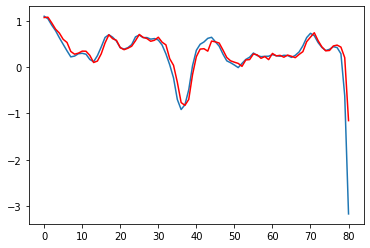

In [10]:
#ARIMA 6,1,1
test = arima(data,6,1,1)
start = len(data['valeur'])
model_fit = test.fit(disp=0)
# newPrediction = model_fit.predict(1,240)

<ipython-input-13-b84b0755955a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_ticklabels(date, rotation = 90)


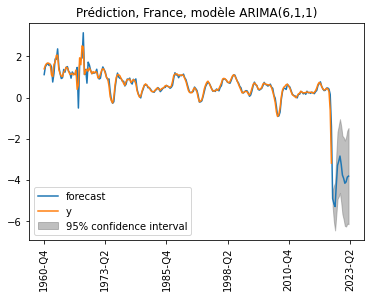

In [13]:
model_fit.plot_predict(1,finF)
date = [0,date[0],date[50],date[100],date[150],date[200],date[250]]
plt.gca().xaxis.set_ticklabels(date, rotation = 90)
plt.title('Prédiction, France, modèle ARIMA(6,1,1)')
plt.show()

c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmode

Test RMSE: 0.228


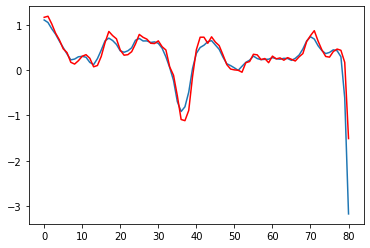

In [14]:
#AR 6
test = arima(data,3,2,1)
model_fit2 = test.fit(disp=0)
# newPrediction = model_fit.predict(1,240)

<ipython-input-15-d2e9687023aa>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_ticklabels(date, rotation = 90)


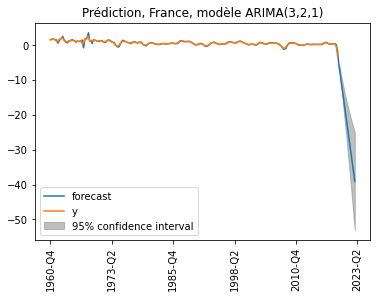

In [15]:
model_fit2.plot_predict(2,finF)
plt.gca().xaxis.set_ticklabels(date, rotation = 90)
plt.title('Prédiction, France, modèle ARIMA(3,2,1)')
plt.show()


c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmode

Test RMSE: 0.286


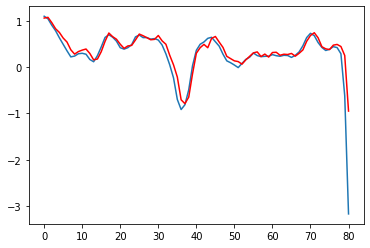

In [16]:
#AR 6
test = arima(data,6,0,0)
start = len(data['valeur'])
model_fit3 = test.fit(disp=0)
# newPrediction = model_fit.predict(1,240)

<ipython-input-18-c99547d79f80>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_ticklabels(date, rotation = 90)


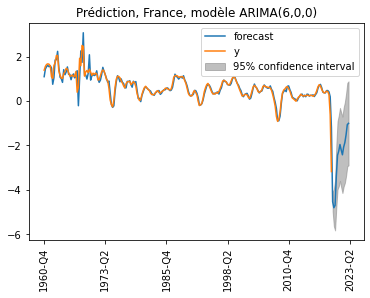

In [18]:
model_fit3.plot_predict(1,finF)
plt.gca().xaxis.set_ticklabels(date, rotation = 90)
plt.title('Prédiction, France, modèle ARIMA(6,0,0)')
plt.show()